# Imports

In [ ]:
import sys
sys.path.insert(0, '..') 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import matplotlib.pyplot as plt

from torchvision.models import inception_v3
from torchvision import transforms
from torch.utils.data import DataLoader
from gan_package.gan import GAN
from gan_package.dcGAN import DCGAN_Generator, DCGAN_Discriminator

# Create dataset

In [2]:
image_size = 256
batch_size=32
root = '../lsun/bedroom'

dataset = dset.ImageFolder(root=root,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    

# Set parameters

In [ ]:
batch_size = 32
learning_rate_gen = 0.0001
learning_rate_dis = 0.005

In [5]:
latent_dim = 100

In [ ]:
img_shape = dataloader.dataset[0][0].shape
n_out = torch.prod(torch.tensor(img_shape))

inception_model = inception_v3(pretrained=True, transform_input=False, aux_logits=True)
dc_generator = DCGAN_Generator()
dc_discriminator = DCGAN_Discriminator()
dc_gan = GAN(generator=dc_generator, discriminator=dc_discriminator, inception_model=inception_model)


criterion = nn.BCELoss()

dc_generator_optimizer = optim.Adam(dc_generator.parameters(), lr=learning_rate_gen, weight_decay=0.0001)
dc_discriminator_optimizer = optim.Adam(dc_discriminator.parameters(), lr=learning_rate_dis, weight_decay=0.0001)

# Training loop

In [ ]:
dc_gan.train(dataset=dataset,
                    dataloader=dataloader,
                    discriminator_optimizer=dc_discriminator_optimizer,
                    generator_optimizer=dc_generator_optimizer,
                    criterion=criterion,
                    num_epochs=20)

In [3]:
gen = DCGAN_Generator()
gen.load_state_dict(torch.load('../models/dc_gan_generator.pt'))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


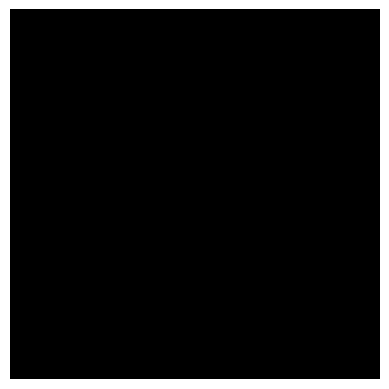

In [8]:
batch_size = 2
z = torch.randn(batch_size, latent_dim)
fake_images = gen(z)


transform = transforms.ToPILImage()
# Convert the tensor to a NumPy array
image_tensor = fake_images[0]
image_np = image_tensor.detach().numpy()

# Transpose the dimensions to match the expected shape for an image
image_np = image_np.transpose(1, 2, 0)

# Display the image using plt.imshow
plt.imshow(image_np)
plt.axis('off')  # Remove axis ticks and labels
plt.show()